# Анализ интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

Вам необходимо проанализировать исторические данные о продажах компьютерных игр, оценках пользователей и экспертов, жанрах и платформах до 2016 года для выявления факторов, определяющих успешность игр. Это поможет вам спланировать рекламные кампании и сделать удачные ставки на популярные продукты в 2017 году. Независимо от того, делаете ли вы прогноз продаж на 2017 год по данным 2016-го или на 2027 год по данным 2026 года, важно уметь корректно работать с данными о продажах, оценках и возрастных категориях игр от ESRB. Ссылка на датасет 


# Получение данных из файла

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import sklearn

In [3]:
#Сохраним файл в переменную
df = pd.read_csv('/Users/a1/Desktop/Мои проекты/Анализ интернет магазина Стримчик/games.csv')

# Первичный обзор данных

In [4]:
#Выведем первые 5 строк датафрейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Выведем общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Набор данных содержит следующие столбцы с информацией: 

`Name` - Название игры

`Platform` - платформа

`Year_of_Release` - год выпуска

`Genre` - жанр игры

`NA_sales` - продажи в Северной Америке (миллионы проданных копий)

`EU_sales` - продажи в Европе (миллионы проданных копий)

`JP_sales` - продажи в Японии (миллионы проданных копий)

`Other_sales` - продажи в других странах (миллионы проданных копий)

`Critic_Score` - оценка критиков (максимум 100)

`User_Score` - оценка пользователей (максимум 10)

`Rating` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



При первичном обзоре выявлено, что всего 16,715 строк и 11 столбцов, в 6 из них наблюдаются пропуски, в оценке критиков пропущено более 50% значений, будем с этим работать

In [6]:
#Применим метод для краткого опсиания характеристик столбцов датасета
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Минимальный год выпускаемой игры - 1980, максимальный - 2016, 50 процентов игр выпускалось в период с 2007 по 2016 год, в оценке критиков всего 8000 записей из 16715, в них минимальный и максимальный рейтинг критиков по 100-бальной шкале 13 и 98 соответственно

In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
df.shape

(16715, 11)

# Предобработка данных.

In [9]:
# проверим кол-во дубликатов, кол-во добликатов 0
df.duplicated().sum()

0

In [10]:
# проверим кол-во пропусков
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [11]:
#Посмотрим на таблицу с пустыми значениями в столбце critic_score.
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
df[df['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df[df['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
#Посмотрим какие платформы для игр находятся в арсенале нашего датасета.
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [16]:
#Посмотрим, какие жанры игр мы имеем, и нет ли у нас повторений.
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Вывод после анализа общей информации:


Необходимо скорректировать тип данных столбца "Year of Release".
Также требуется привести все названия столбцов и их содержимое к нижнему регистру.
Обнаружены пропущенные значения в столбцах "rating", "user_score" и "critic_score". Для столбца "Year of Release" возможно использовать имеющиеся данные для заполнения пропущенных значений.
В таблице отсутствуют дубликаты.

Информация о столбцах 'critic_score' и 'user_score':

Следует учитывать, что вторая половина 90-х годов стала временем появления крупнейших платформ, отслеживающих рынок игр, таких как IGN (1996 год), Igromania (1997 год) и Metacritic (1998 год). Следовательно, есть вероятность того, что не все игры, выпущенные до 1996 года, получили оценки от критиков. Аналогичная ситуация возникает и с пользовательскими оценками в столбце 'user_score', так как для размещения оценок игр пользователям требовалась соответствующая платформа в интернете. Пустые значения в этих столбцах также могут быть обусловлены тем, что данные не охватывают весь 2016 год.

Информация о столбце 'raiting':
Крупнейшая негосударственная организация ESRB, присваивающая рейтинги играм, была создана в 1994 году. Следовательно, не все игры, выпущенные до этого времени, получали рейтинг от данной организации.

In [17]:
# Заменим названия столбцов (приведем к нижнему регистру) 
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [18]:
# Приведем к нижнему регистру следующие столбцы:
for column in df[['name','platform','genre','rating']]:
    df[column] = df[column].str.lower()

In [19]:
# Изменим тип данных в столбце year_of_release 
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [20]:
#Посмотрим как выглядит теперь наша таблица
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [21]:
# Возьмем одну из 269 игр с неуказанным годом и проверим, выпускалась ли она на других платформах.
df.query('name == "madden nfl 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
1881,madden nfl 2004,xb,2003,sports,1.02,0.02,0.00,0.05,92.0,8.3,e
3889,madden nfl 2004,gc,2003,sports,0.40,0.10,0.00,0.01,94.0,7.7,e
5708,madden nfl 2004,gba,2003,sports,0.22,0.08,0.00,0.01,70.0,6.6,e


In [22]:
# Можно попробовать восполнить пробелы в годах за счет наличия в датасете информации об одних и тех же играх, только выпущенных
# для разных платформ (в надежде, что у какой-то из версий игры будет запись о годе, как это оказалось с игрой "madden nfl 2004").
for i in df[df['year_of_release'].isnull() == True].index:
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

In [23]:
#Посмотрим сколько удалось заполнить пустых значений
df['year_of_release'].isna().sum()

146

In [24]:
#Заменим tbd на NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [25]:
# Поменяем формат столбца user_score на float
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype

dtype('float64')

In [26]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Вывод по предобработке данных.¶
Там, где могли, мы заменили пропущенные значения (столбец 'year of release'). Что касается остальных пропусков, для их заполнения у нас недостаточно данных. Поэтому, лучше будем работать с меньшим количеством данных но хорошего качества. В остальном же, ошибки в данных устранены. Данные подготовлены к дальнейшему анализу.

# Исследовательский анализ данных
    

**Сколько игр выпускалось в разные годы:**
* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<Axes: xlabel='year_of_release'>

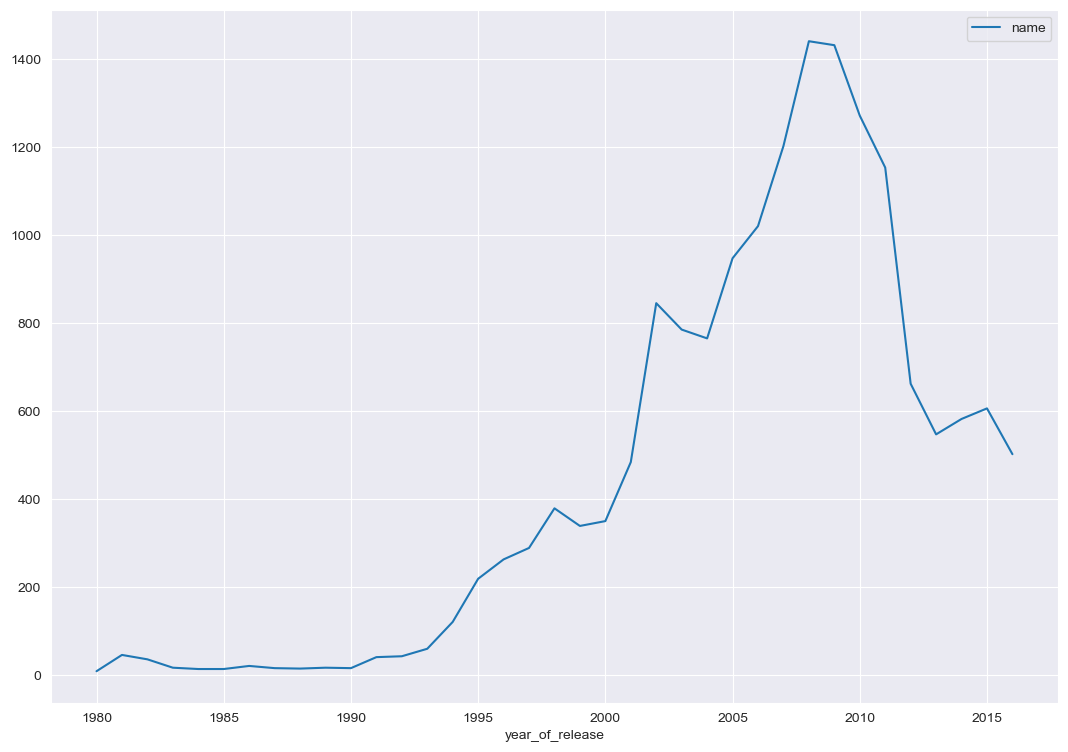

In [27]:
# построим график зависимости количества игр от года выпуска
games_per_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(figsize = (13,9), grid = True)
games_per_year

Вывод

Из анализа данных следует, что начиная с начала 1990-х годов, количество игр ежегодно стремительно растет. Этот рост можно объяснить развитием компьютерной технологии: широкое использование CD-ROM для хранения и распространения данных, а также распространение операционных систем, таких как Microsoft Windows и Mac OS, с их графическим интерфейсом. Значительное развитие технологии трехмерной графики также оказало свое влияние. В это время игровые приставки, такие как Nintendo, Playstation и позднее Xbox, также начали набирать популярность. Этот рост продолжался до 2008 года.

К концу 1990-х годов увеличение скорости доступа в Интернет способствовало развитию браузеров как самостоятельной игровой платформы. В середине 2000-х годов произошел взрывной рост социальных сетей, которые стали новым способом общения. Разработчики игр больше не могли игнорировать браузерную платформу, что привело к появлению отдельных игровых платформ и игр для нее. Кроме того, появление мобильных платформ iOS и Android в конце 2000-х годов способствовало смещению акцентов в сторону мобильных приложений и игр. Это привело к резкому спаду в популярности консольных игр с 2009 по 2016 годы.

**Как менялись продажи по платформам:**
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Text(0, 0.5, 'Количество продаж')

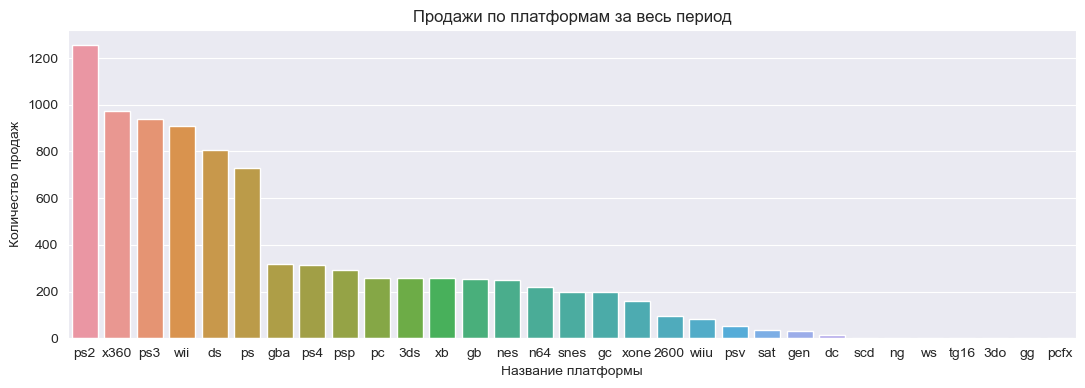

In [28]:
sales_on_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

**Вывод:** Из данного графика можно выделить несколько платформ с наибольшими суммарными продажами, например, PS2, X360, PS3, Wii, DS, PS. Данные 6 платформ выделяются от всех остальных наибольшими суммарными продажами.

***Посмотрим, как менялись продажи по платформам с максимальным количеством продаж, построим распределение по годам:***

In [29]:
platform_grouped = sales_on_platform.reset_index()

In [30]:
#Составим список всех платформ.
top_platforms_list = platform_grouped['platform'].unique()
top_platforms_list

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc',
       '3ds', 'xb', 'gb', 'nes', 'n64', 'snes', 'gc', 'xone', '2600',
       'wiiu', 'psv', 'sat', 'gen', 'dc', 'scd', 'ng', 'ws', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

/Users/a1/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


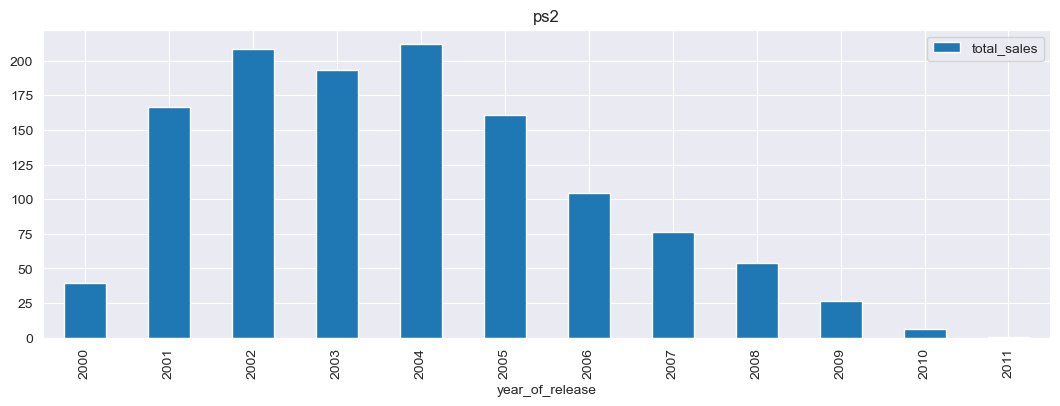

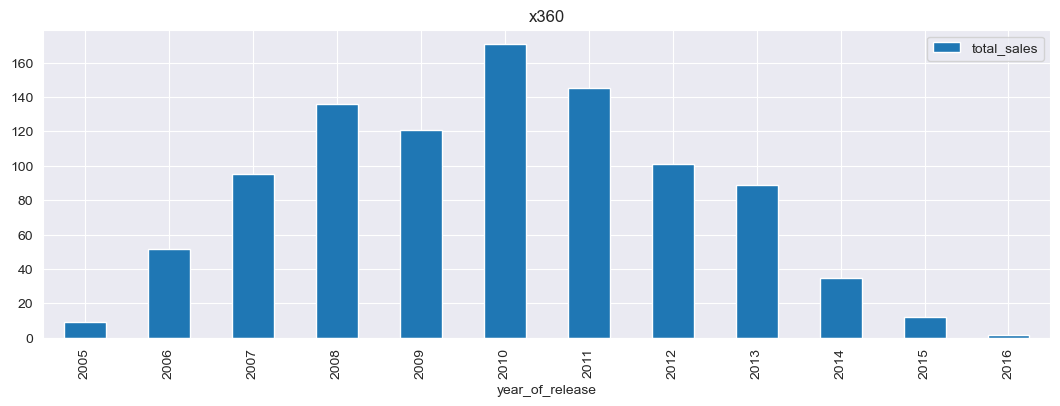

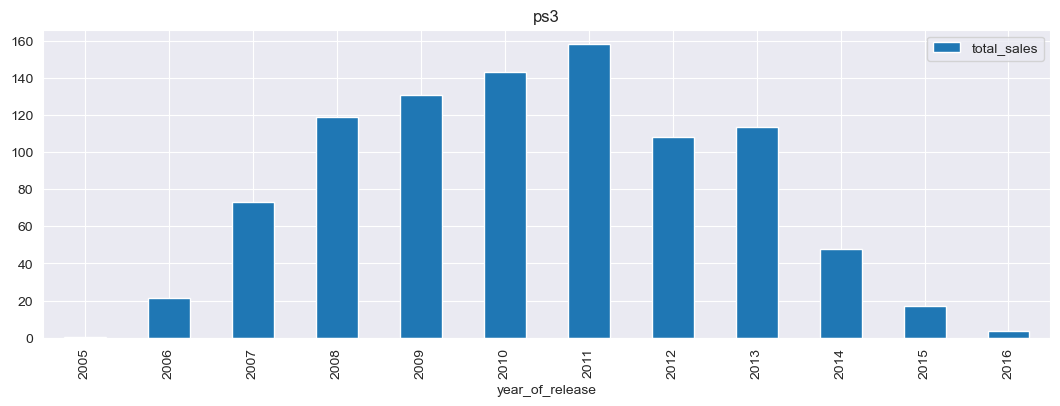

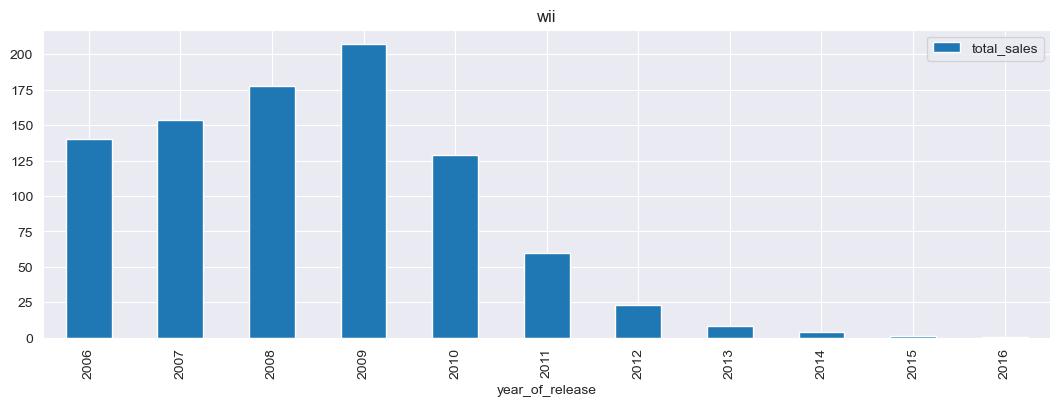

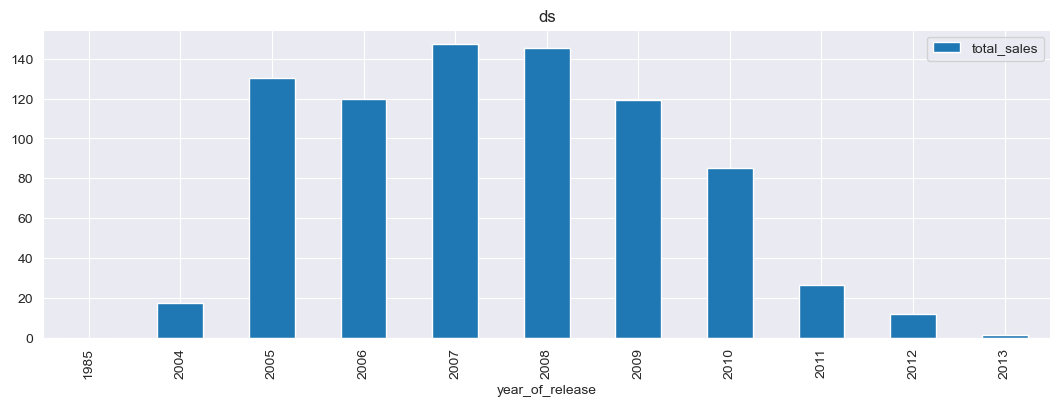

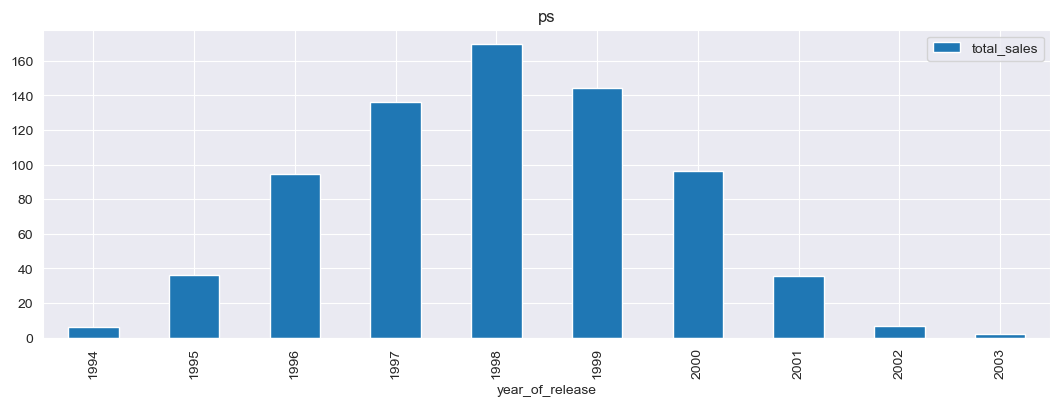

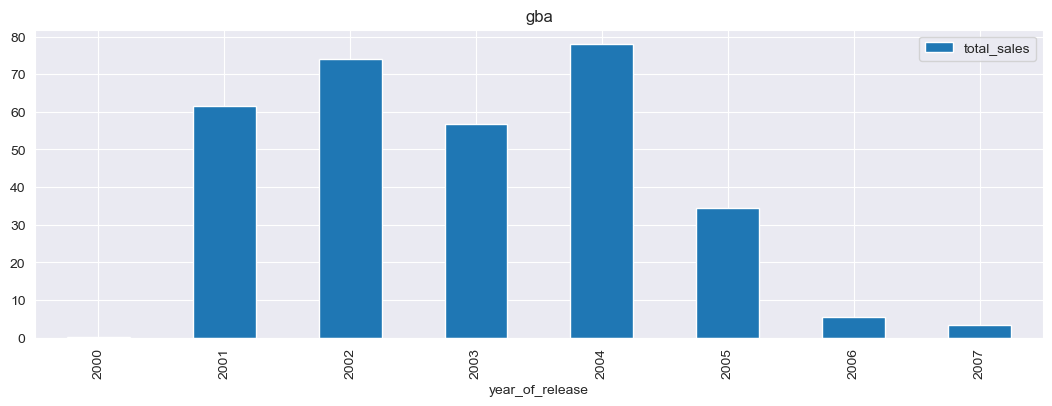

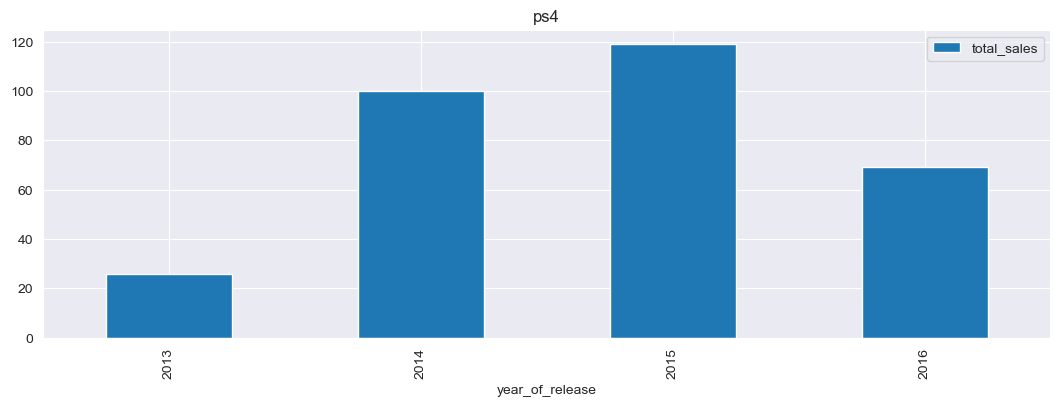

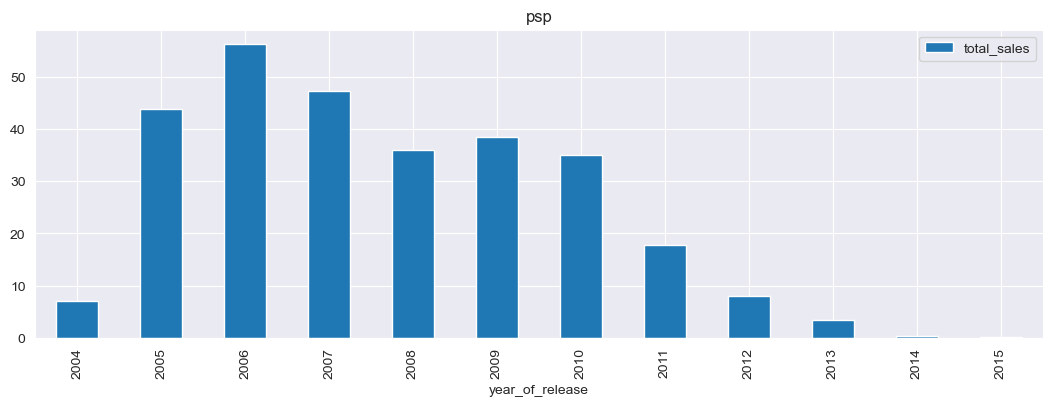

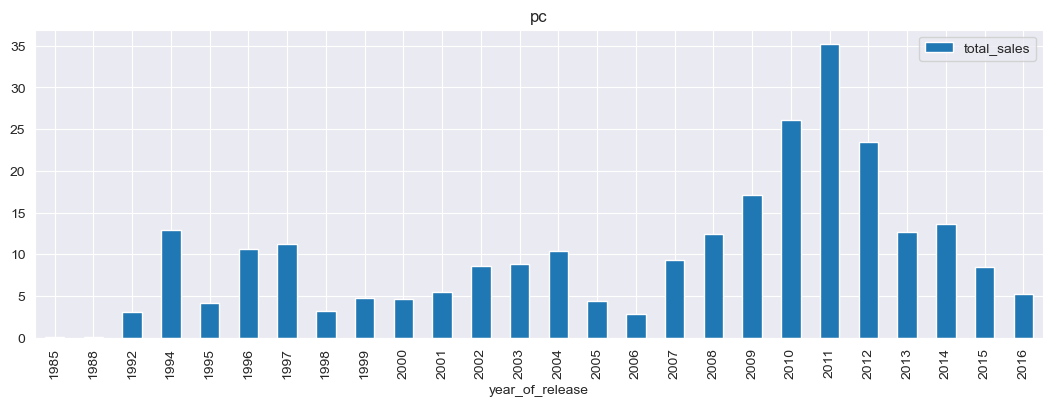

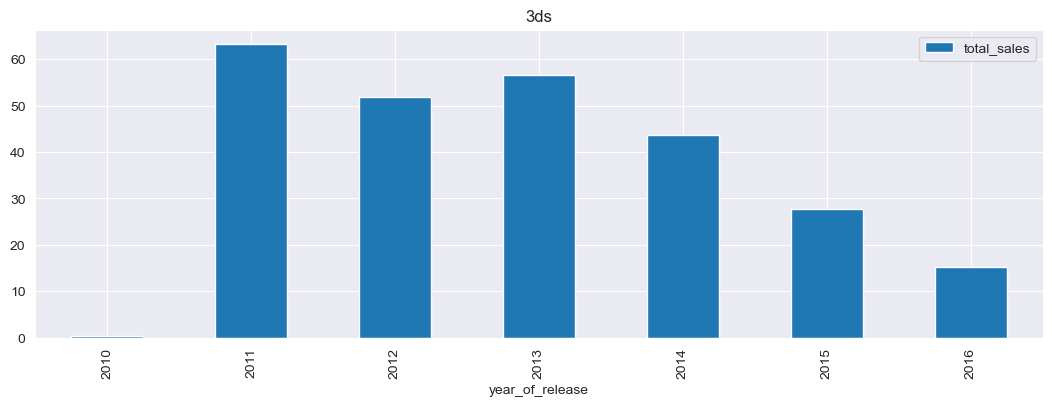

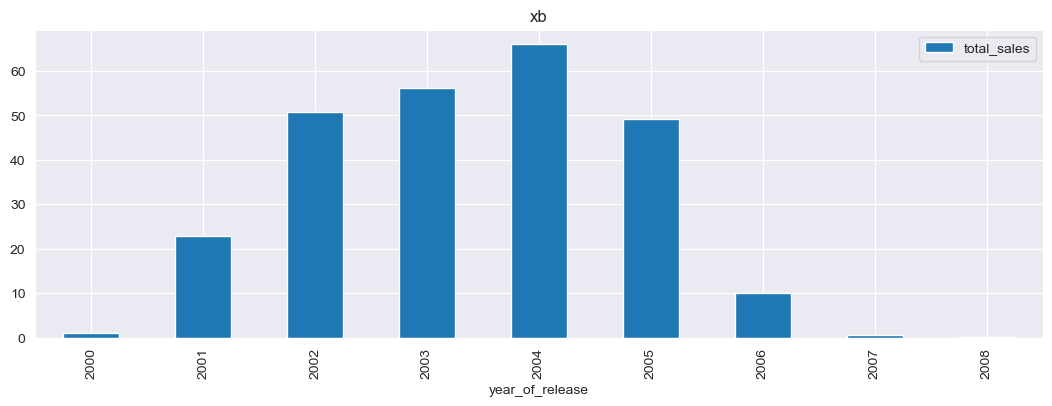

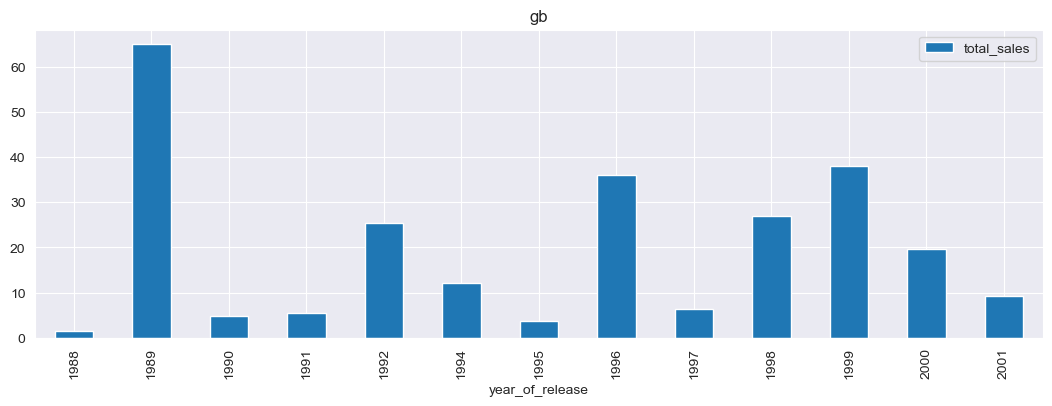

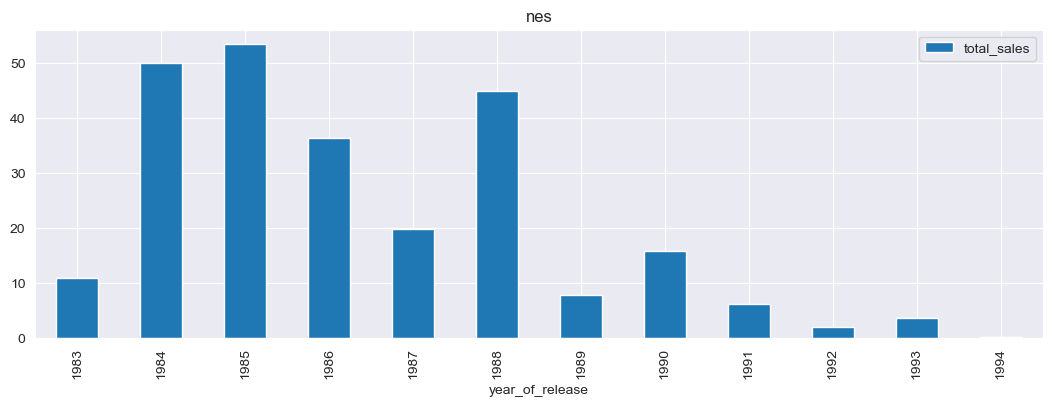

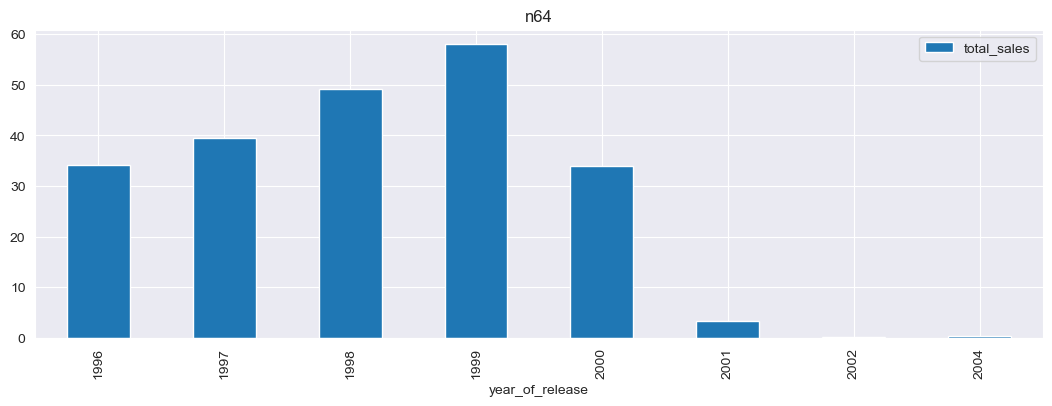

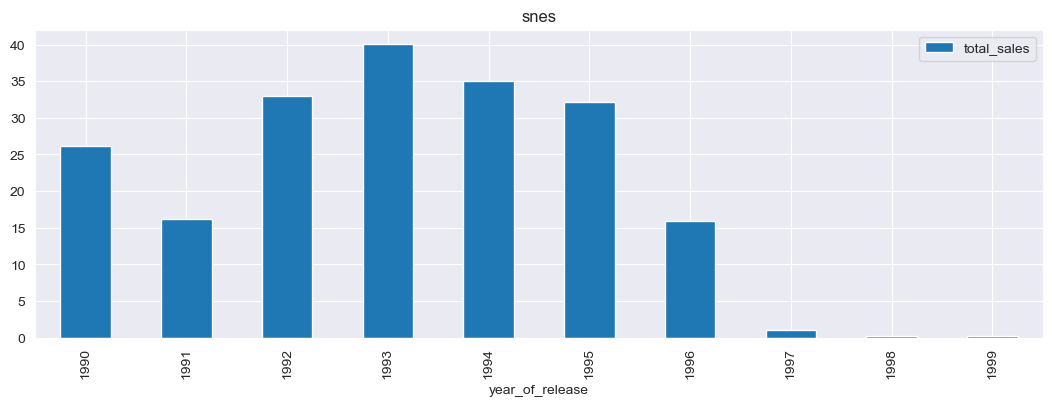

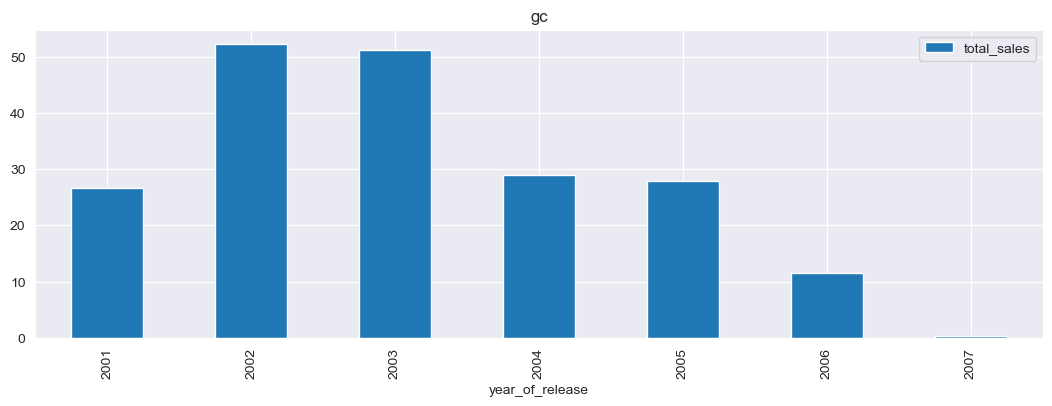

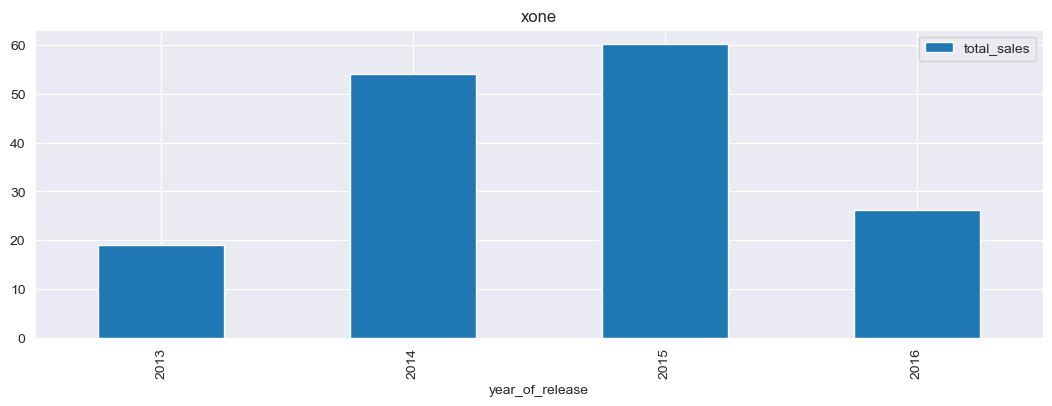

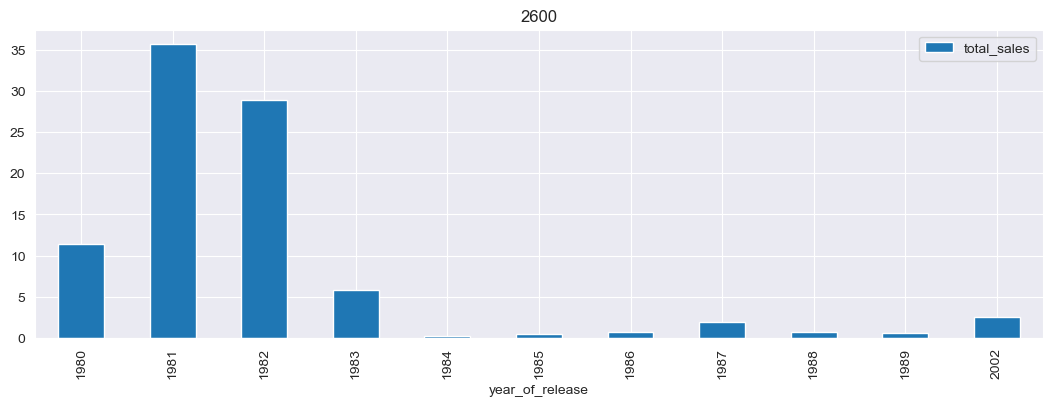

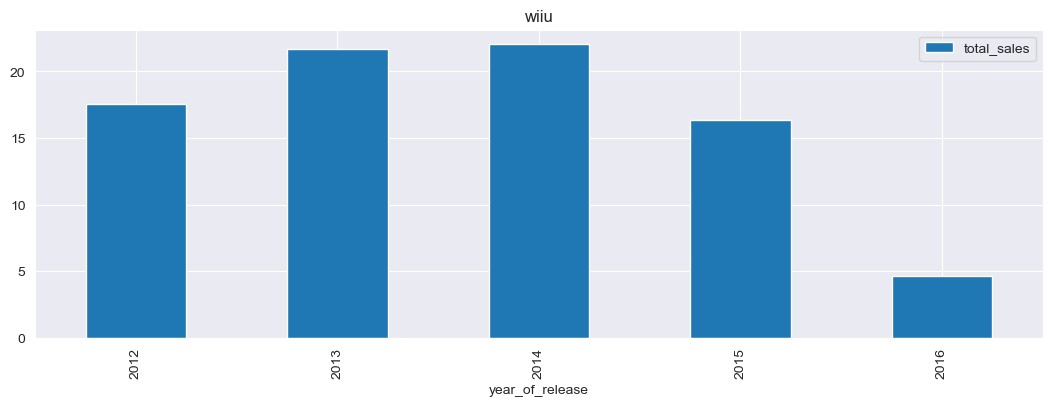

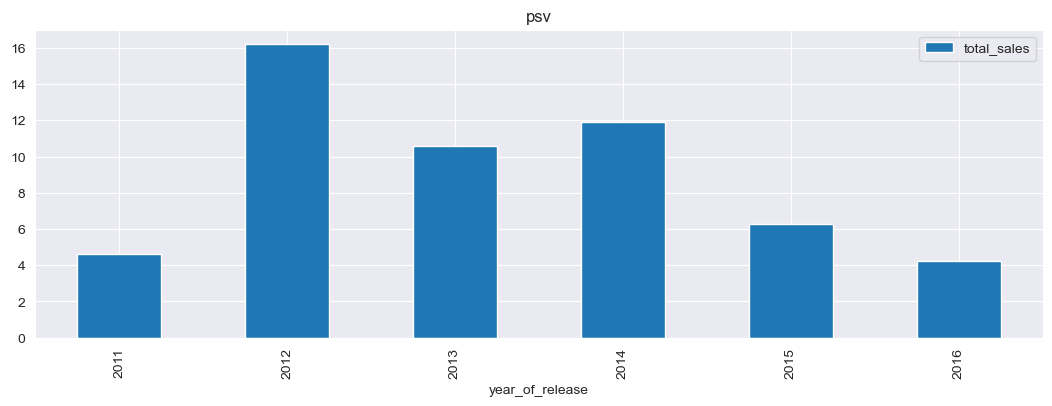

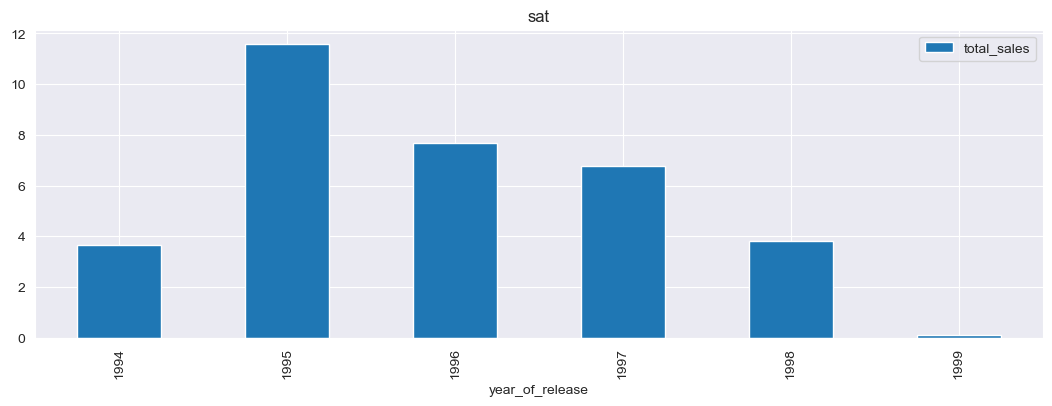

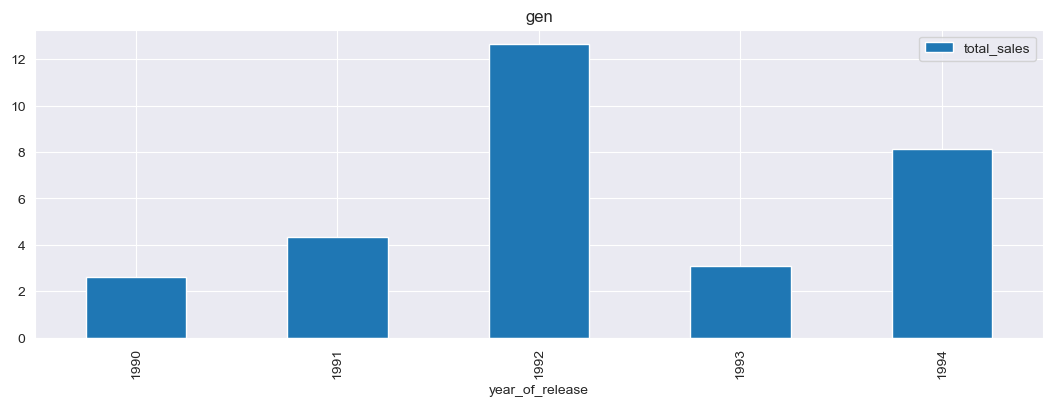

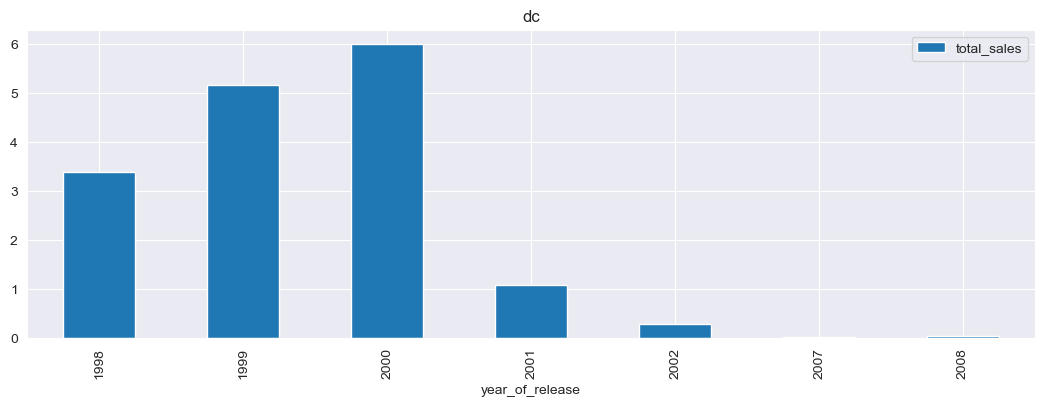

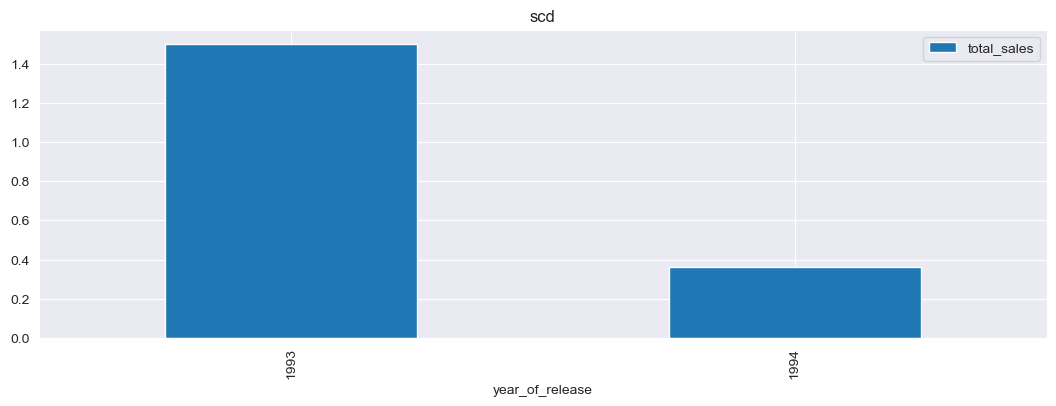

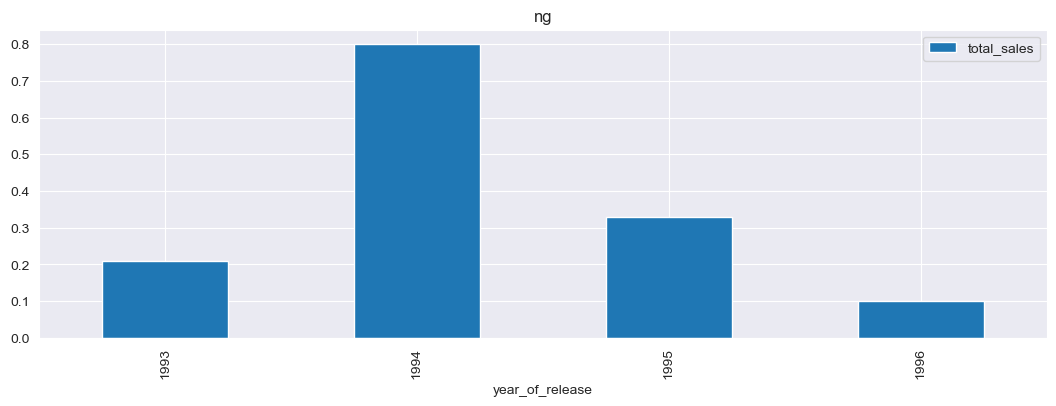

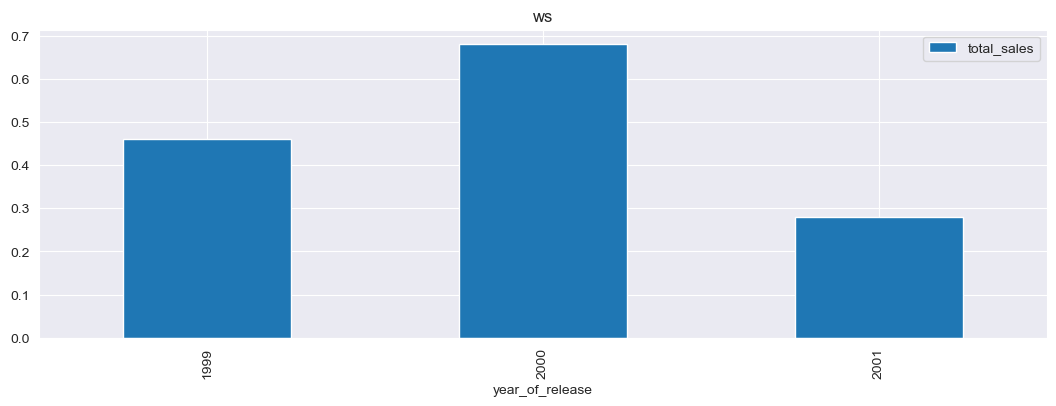

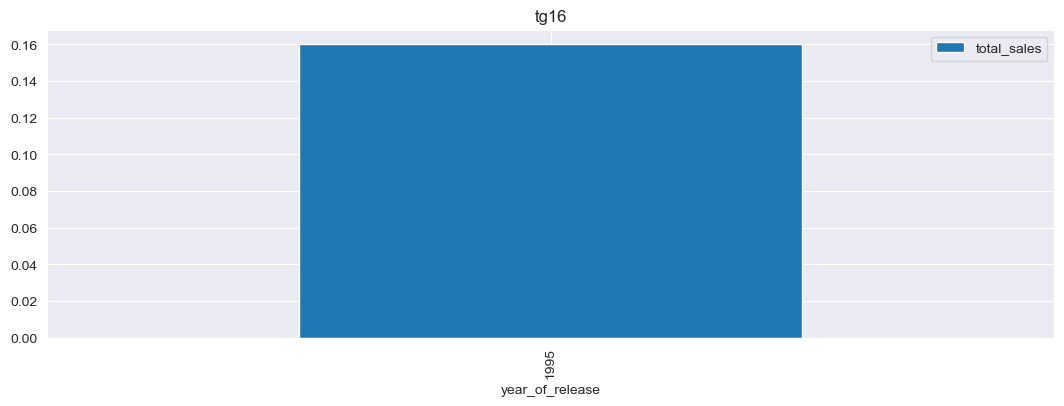

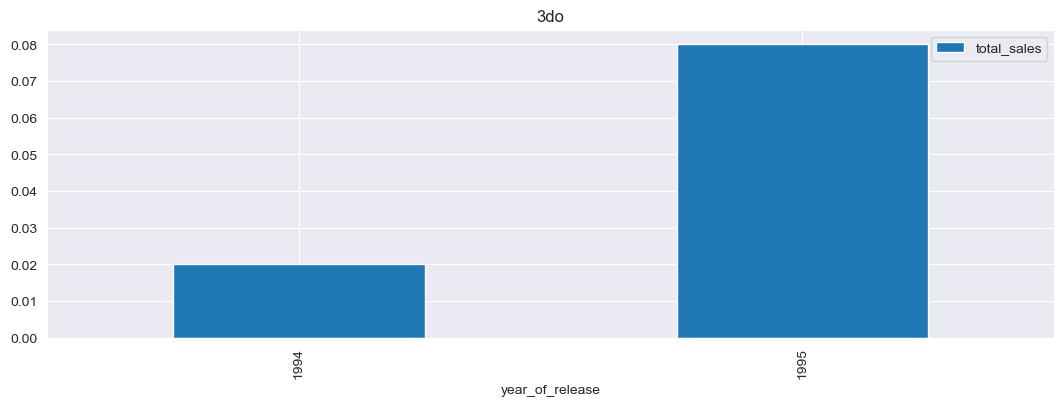

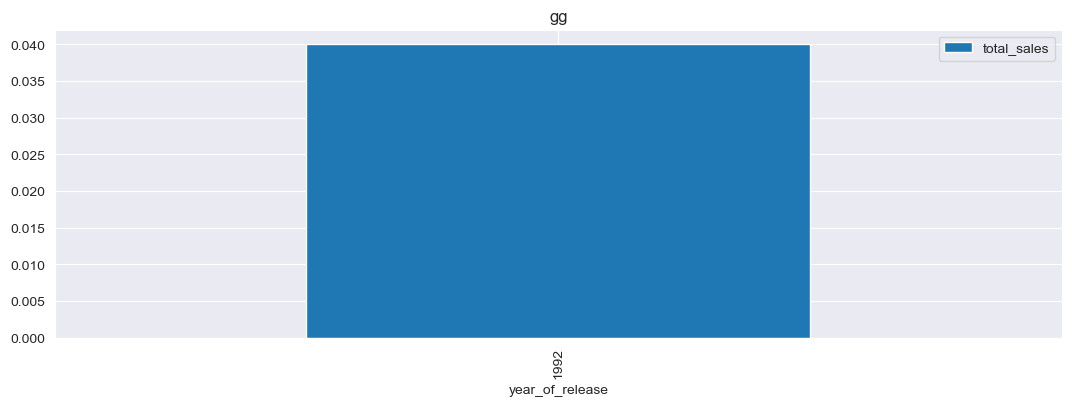

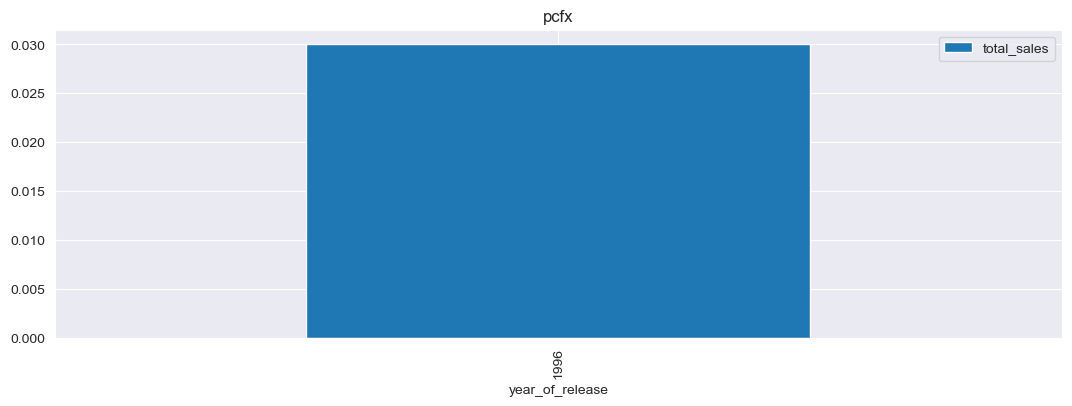

In [31]:
#Построим распределения по годам для каждой платформы.
for platform in top_platforms_list:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

In [32]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.
top_5_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

In [33]:
# Выведем топ 5 продаваемых платформ
top_5_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


Вывод:

- Отталкиваясь от диаграмм распределения, можно сделать вывод, что средний период 'жизни' платформ длится 8-10 лет.
- Пятерка лидирующих по продажам за всё время платформ в нашем датасете теряет свое могущество на момент 2016 года.
- Большая часть платформ из нашего списка уже приказала долго жить. Из тех, кто продолжает оставаться на плаву в 2016 году, можно отметить: PS4, PC, Nintendo 3DS, XBOX One, Nintendo Wii U, PlayStation Vita.  

In [46]:
# Сейчас у нас выделяются 3 явных этапа развития индустрии: рост до 2008 года, пик 2008 и 2009 годов, а также сокращение рынка
# последних годов.
# Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут.
# При уменьшении периода в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только
# конечный на данный момент интервал развития игровой индустрии.
decline_period_data = df[df['year_of_release'] > 2009]
decline_period_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,e,21.82
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
27,pokemon black/pokemon white,ds,2010,role-playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.0,3.4,m,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [47]:
#Сохраним в переменной df_top_5_platforms только последние поколения платформ и избавимся от выбросов
list_of_top_6 = ['ps4','xone','pc','wiiu','3ds', 'psv']
games_top_6_platforms = decline_period_data[decline_period_data['platform'].isin(['ps4','xone','pc','wiiu','3ds', 'psv'])]
games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['total_sales']<1.4]

In [48]:
games_top_6_platforms['total_sales'].describe()

count    2051.000000
mean        0.206845
std         0.271240
min         0.010000
25%         0.030000
50%         0.090000
75%         0.260000
max         1.390000
Name: total_sales, dtype: float64

In [49]:
#Посмотрим на количество выпущенных каждой платформой игр, а также на средние глобальные продажи по платформам.
games_top_6_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,480.0,0.215146,0.266073,0.01,0.04,0.11,0.2625,1.39
pc,469.0,0.171002,0.237493,0.01,0.03,0.07,0.2000,1.36
ps4,326.0,0.258558,0.298397,0.01,0.05,0.12,0.3600,1.32
psv,426.0,0.114648,0.168551,0.01,0.02,0.05,0.1300,1.31
wiiu,135.0,0.294222,0.302792,0.01,0.07,0.19,0.4200,1.30
xone,215.0,0.315907,0.364930,0.01,0.05,0.16,0.4550,1.39


Text(0, 0.5, 'Глобальные продажи')

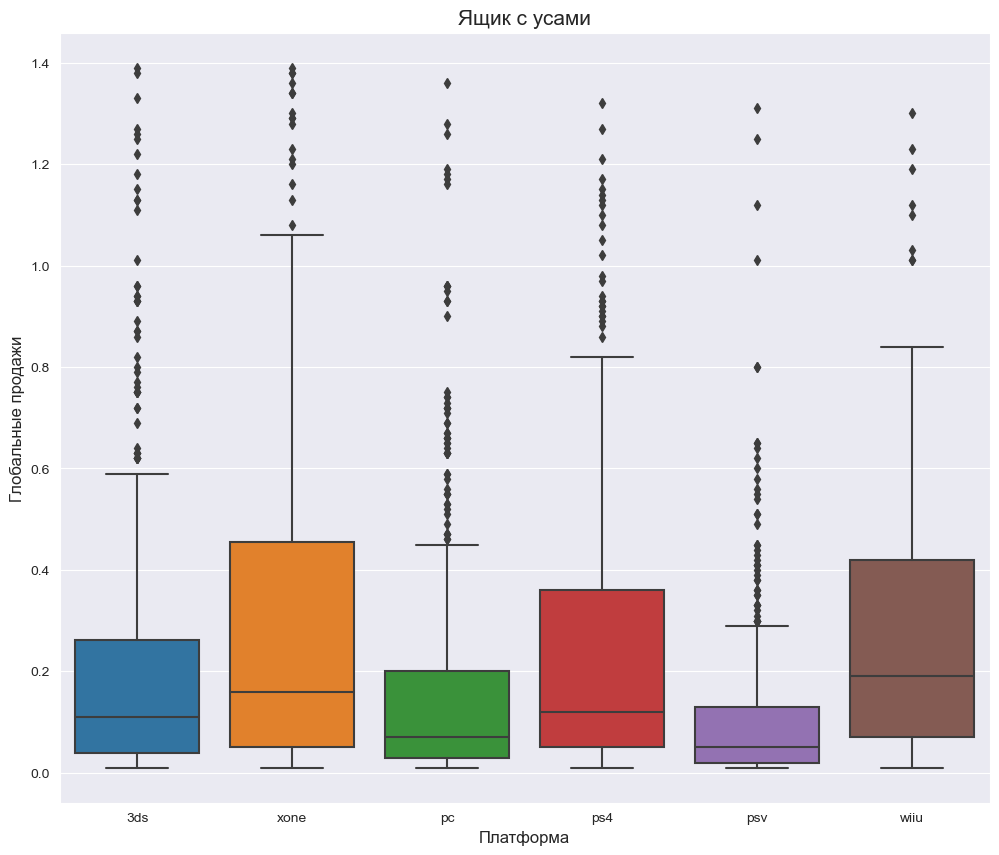

In [50]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,10))
sns.boxplot(data=games_top_6_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Вывод

- Исходя из графиков видно, что медиана протекает у всех по разному.
- Больше всех продаж у WiiU, затем XOne, после PS4, 3DS, PC и PSV на последнем месте.
- Успех WiiU можно попробовать объяснить наличием в данной модели нового контроллера, который мог использоваться как дополнительный сенсорный экран. Также браузер WiiU на момент ее выхода (конец 2012 года) был одним из лучших среди домашних консолей.
- Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. Часть стран увидела их в конце 2013, часть только во второй половине 2014.
- ПК на данном промежутке времени отошли на второй план, уступив авансцену приставкам.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [51]:
#Корреляция между оценками пользователей и продажами 
sony_play_station4 = df[df['platform']=='ps4']
sony_play_station4['user_score'].corr(sony_play_station4['total_sales'])

-0.031957110204556466

Text(0.5, 1.0, 'corr_ps4_users')

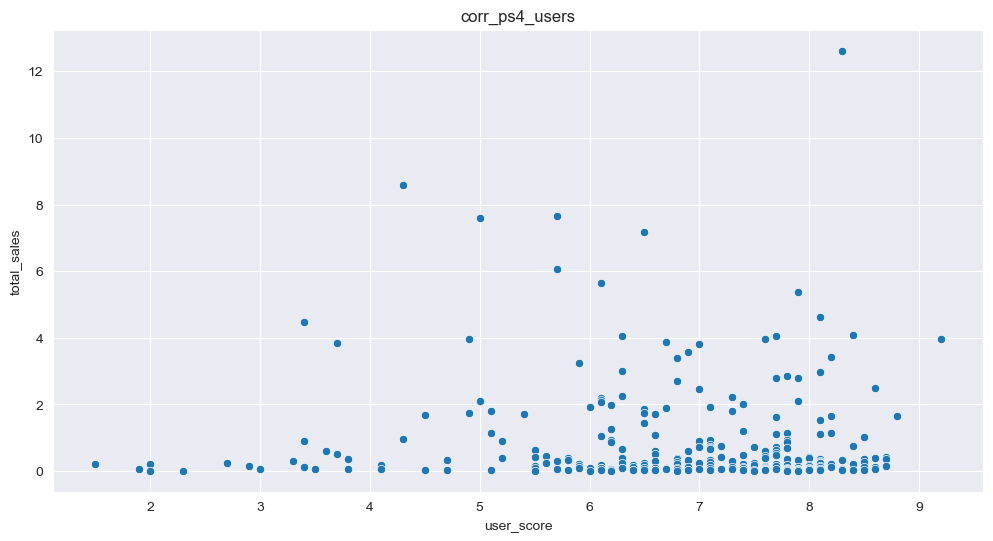

In [52]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station4)
plt.title('corr_ps4_users')

In [53]:
#Корреляция между оценками критиков и продажами 
sony_play_station4 = df[df['platform']=='ps4']
sony_play_station4['critic_score'].corr(sony_play_station4['total_sales'])

0.4065679020617815

Text(0.5, 1.0, 'corr_ps4_critics')

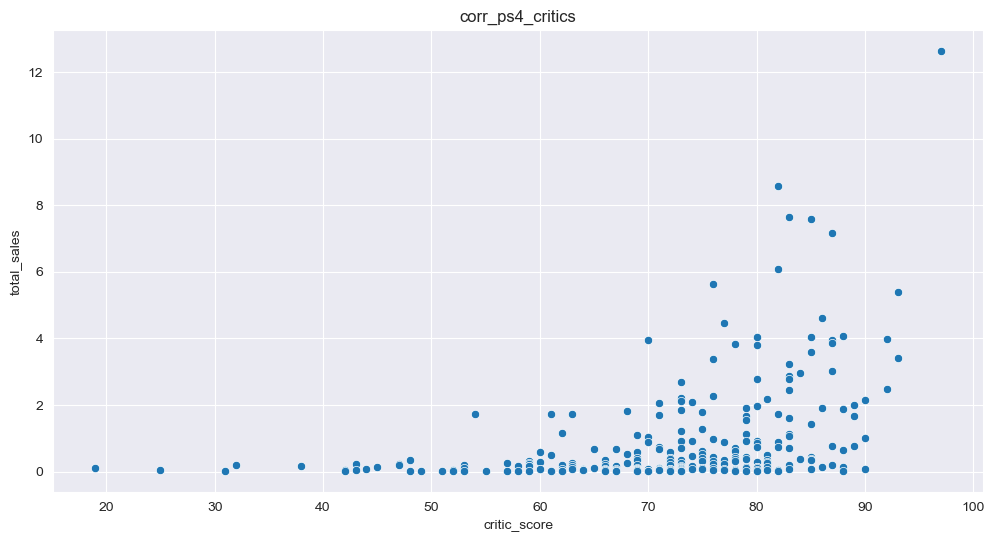

In [54]:
#Построим диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station4)
plt.title('corr_ps4_critics')

In [55]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = df[df['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()

    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])


    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)

    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')
    if 0.1 >= correl >= -0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Корреляция не выявлена', correl)
    if -0.1 >= correl >= -0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая обратная', correl)
    if -0.3 >= correl >= -0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная обратная', correl)
    if -0.5 >= correl >= -0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая обратная', correl)
    if -0.7 >= correl >= -0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая обратная', correl)
    if -0.9 >= correl >= -1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная обратная', correl)
    print('\n')


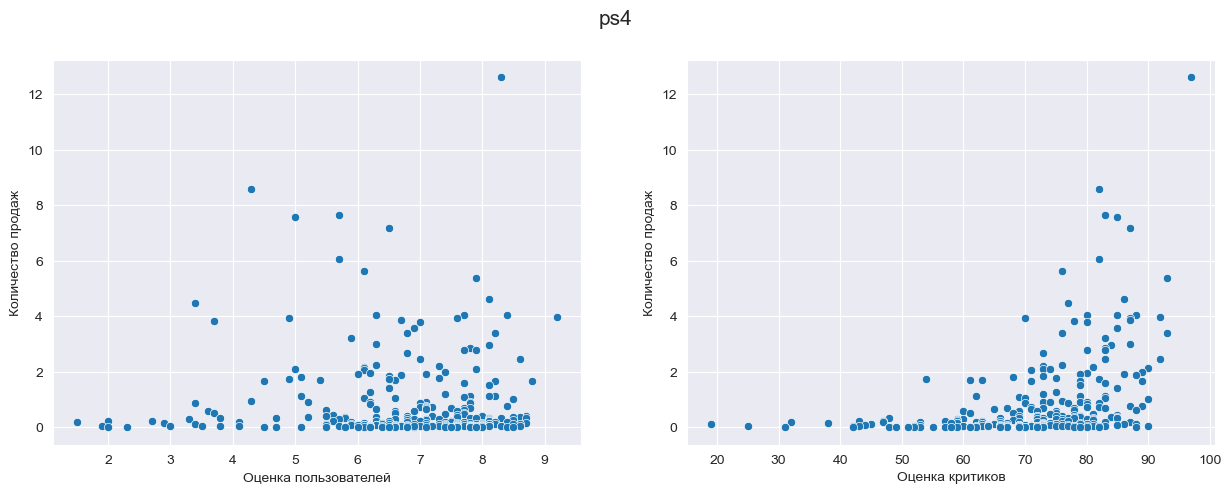

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.4065679020617815


Корреляция между отзывами пользователей и продажами  PS4 : Корреляция не выявлена -0.031957110204556466


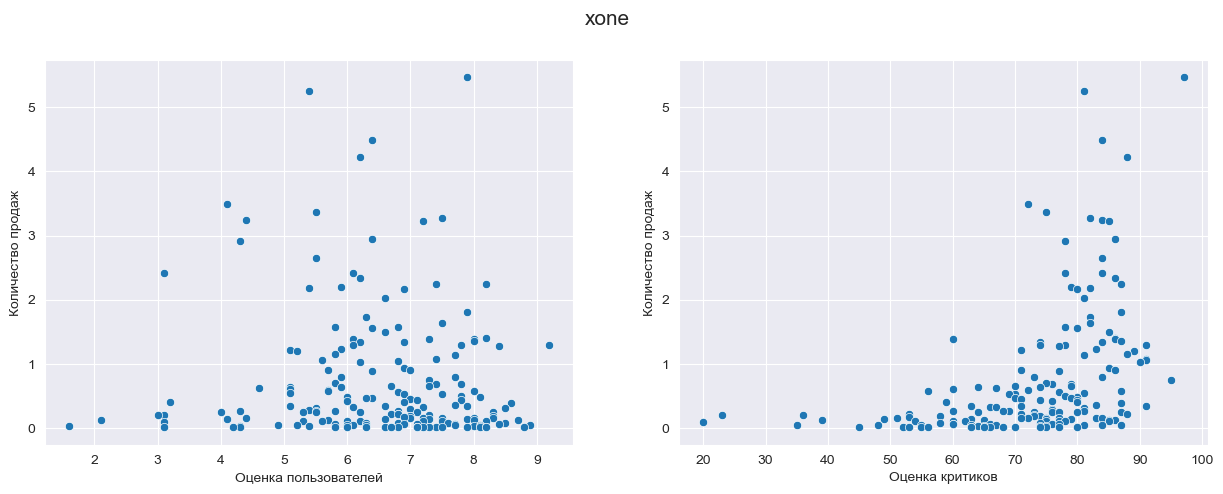

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.4169983280084016


Корреляция между отзывами пользователей и продажами  XONE : Корреляция не выявлена -0.06892505328279419


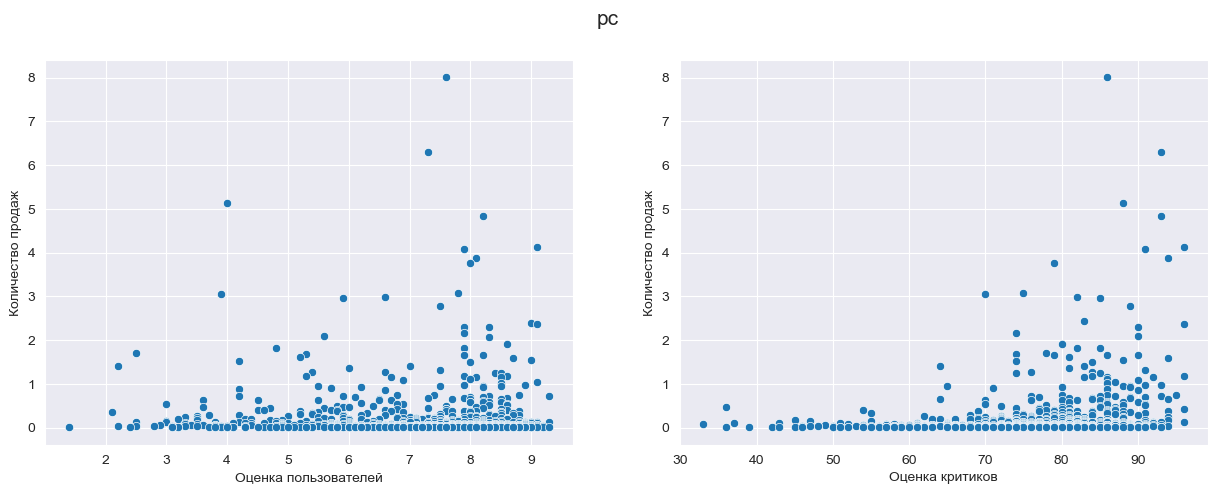

Корреляция между отзывами критиков и игровой платформой  PC : Слабая 0.2568867378948212


Корреляция между отзывами пользователей и продажами  PC : Корреляция не выявлена 0.010475684621486432


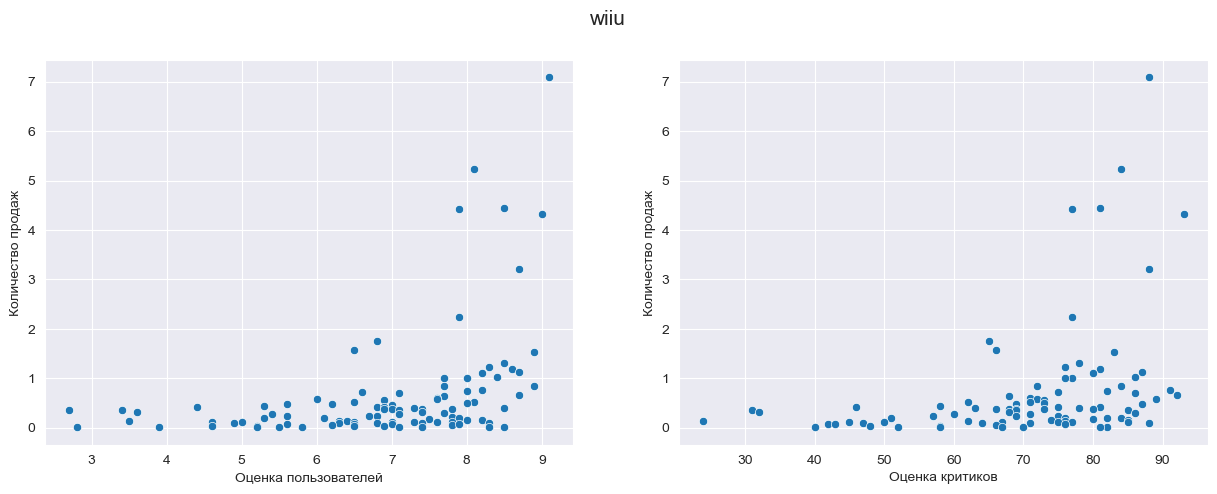

Корреляция между отзывами критиков и игровой платформой  WIIU : Умеренная 0.3483797601201749
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.40021902021486155


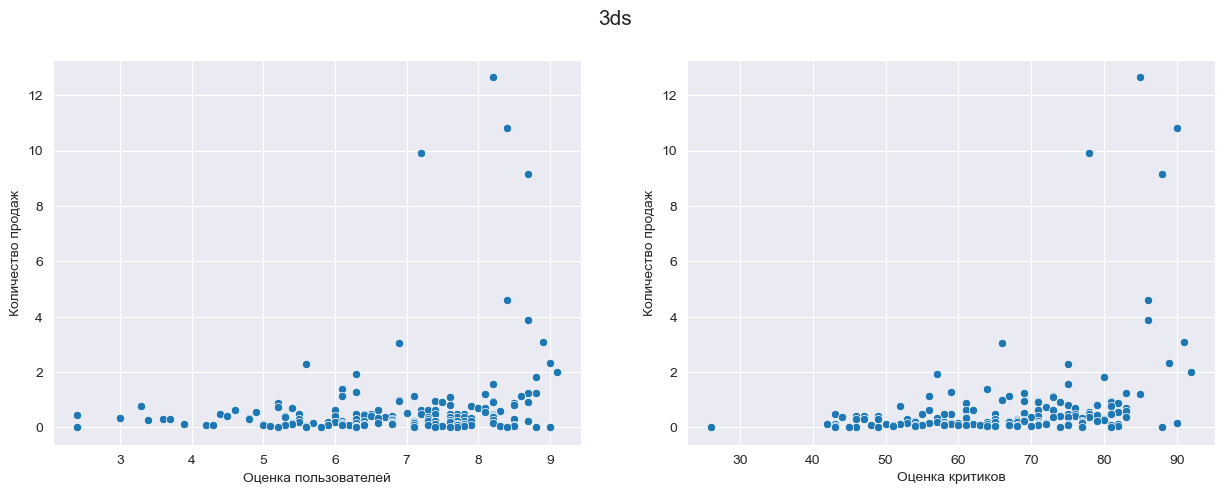

Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.34940093039241304
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.22480798039571068


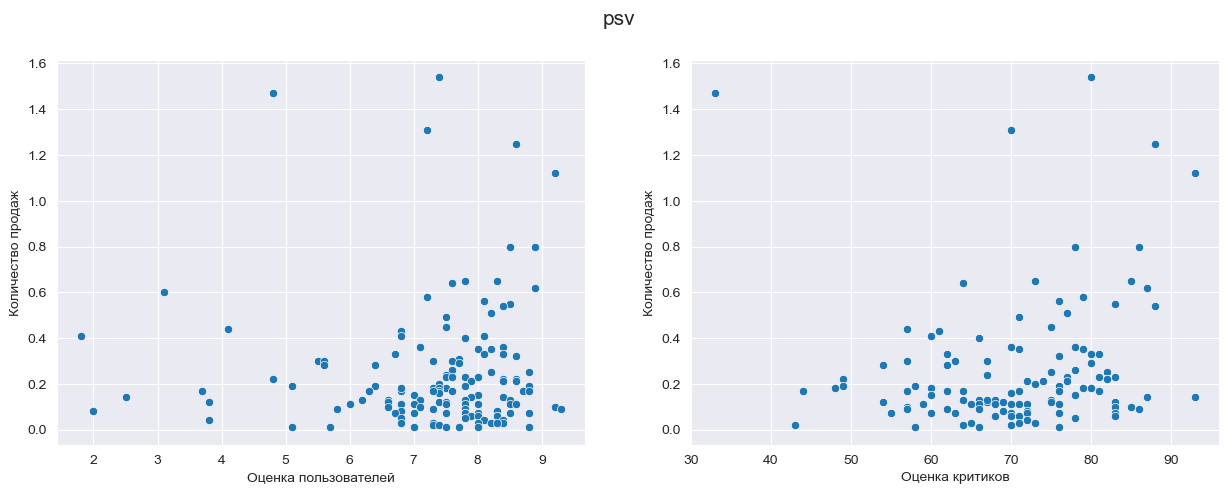

Корреляция между отзывами критиков и игровой платформой  PSV : Слабая 0.13151672154292643


Корреляция между отзывами пользователей и продажами  PSV : Корреляция не выявлена 0.013579522883028857


In [56]:
#С помощью цикла выведем все 6 графиков
for platform in list_of_top_6:
    other_platform_matrix(platform)

Вывод:

У PS4, Xbox One, WiiU, 3DS наблюдается пусть и не сильная, но всё же, связь между оценками критиков и продажами. А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. Только у WiiU корреляция между отзывами пользователей и продажами - уверенная и даже выше, чем корреляция между отзывами критиков и игровой платформой. Интересное наблюдение (окружен, но не сломлен). Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей. Но, опять же, данная аксиома не распространяется на платформу WiiU: там пользователи заправляют балом.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?¶

In [57]:
distr_genre = df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,action,1744.17
1,sports,1331.27
2,shooter,1052.45
3,role-playing,934.56
4,platform,827.77
5,misc,802.51
6,racing,728.67
7,fighting,447.53
8,simulation,389.97
9,puzzle,242.57


Text(0, 0.5, 'Продажи')

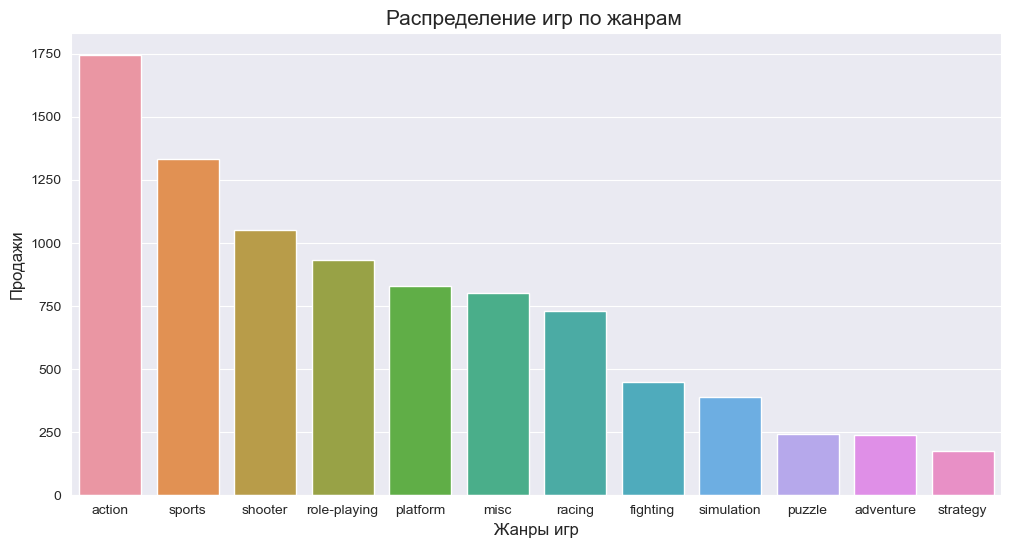

In [58]:
#Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Вывод по исследовательскому анализу данных:¶
Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
Средняя жизнь игровой платформы составляет 8-10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
Больше всего было продано игр на Sony Playstation и Xbox 360.
У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
Самый популярный жанр за последние 10 лет: 'Action'. Якорем висит жанр 'Puzzle'.

# Проведем исследование статистических показателей.

Посмотрим, как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах.

<Axes: ylabel='genre'>

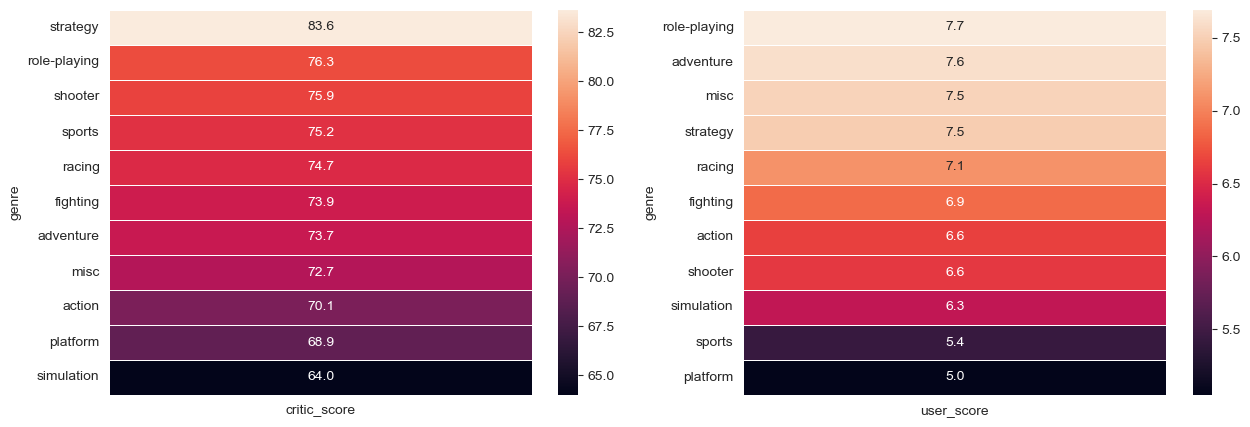

<Figure size 1000x500 with 0 Axes>

In [59]:
# Выведем две сводные талицы по жанрам и рейтингам за 2016 год.
critic_genre = df[df['year_of_release'] > 2015].pivot_table(
    index='genre', values='critic_score', aggfunc='mean').fillna(0).applymap(float).sort_values(by='critic_score', ascending=False)
user_genre = df[df['year_of_release'] > 2015].pivot_table(
    index='genre', values='user_score', aggfunc='mean').fillna(0).applymap(float).sort_values(by='user_score', ascending=False)
fig, ax = plt.subplots(1 ,2, figsize=(15,5))
plt.figure(figsize=(10,5))
sns.heatmap(critic_genre, annot=True, fmt='.1f', linewidths=.5, ax=ax[0])
sns.heatmap(user_genre, annot=True, fmt='.1f', linewidths=.5, ax=ax[1])

Вывод:

На основе средних оценок по жанрам за 2016 год можно заключить:

Наивысшие оценки критиков получают: strategy, role-playing, shooter.
Наивысшие оценки пользователей получают: role-playing, adventure, misc.
Это говорит о том, что мнения критиков по поводу игр не всегда совпадают с мнением пользователей.

In [60]:
#Составим массив с игровыми жанрами. 
game_genres = df['genre'].unique()
game_genres = game_genres[:-1]
game_genres

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

In [61]:
# Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам пользователей.
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(df[df['genre']==genre]['user_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(df[df['genre']==genre]['user_score']))
    print('Среднее',genre.upper(),':',  df[df['genre']==genre]['user_score'].mean())
    print('Медиана',genre.upper(),':',  df[df['genre']==genre]['user_score'].median())
    print('\n')

Дисперсия SPORTS : 2.5941606711770206
Стандартное отклонение SPORTS : 1.610639832854329
Среднее SPORTS : 6.96119673617407
Медиана SPORTS : 7.4


Дисперсия PLATFORM : 2.2856989693423015
Стандартное отклонение PLATFORM : 1.511852826614516
Среднее PLATFORM : 7.3014018691588785
Медиана PLATFORM : 7.7


Дисперсия RACING : 2.387956805011669
Стандартное отклонение RACING : 1.5453015255967584
Среднее RACING : 7.036193447737911
Медиана RACING : 7.4


Дисперсия ROLE-PLAYING : 1.1836433722368822
Стандартное отклонение ROLE-PLAYING : 1.0879537546407394
Среднее ROLE-PLAYING : 7.619515477792732
Медиана ROLE-PLAYING : 7.8


Дисперсия PUZZLE : 2.291562499999999
Стандартное отклонение PUZZLE : 1.513790771540109
Среднее PUZZLE : 7.175
Медиана PUZZLE : 7.5


Дисперсия MISC : 2.388395037385652
Стандартное отклонение MISC : 1.545443314193585
Среднее MISC : 6.819362186788155
Медиана MISC : 7.1


Дисперсия SHOOTER : 2.3020877958621497
Стандартное отклонение SHOOTER : 1.5172632585883539
Среднее SHOOTER : 7.04

In [62]:
# Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам критиков.
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(df[df['genre']==genre]['critic_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(df[df['genre']==genre]['critic_score']))
    print('Среднее',genre.upper(),':',  df[df['genre']==genre]['critic_score'].mean())
    print('Медиана',genre.upper(),':',  df[df['genre']==genre]['critic_score'].median())
    print('\n')

Дисперсия SPORTS : 192.44957338338844
Стандартное отклонение SPORTS : 13.872619557365091
Среднее SPORTS : 71.96817420435511
Медиана SPORTS : 75.0


Дисперсия PLATFORM : 174.2521284649547
Стандартное отклонение PLATFORM : 13.200459403556934
Среднее PLATFORM : 68.05835010060362
Медиана PLATFORM : 69.0


Дисперсия RACING : 202.7385680865442
Стандартное отклонение RACING : 14.238629431463696
Среднее RACING : 67.96361185983828
Медиана RACING : 69.0


Дисперсия ROLE-PLAYING : 143.80064768055632
Стандартное отклонение ROLE-PLAYING : 11.991690776556753
Среднее ROLE-PLAYING : 72.65264586160109
Медиана ROLE-PLAYING : 74.0


Дисперсия PUZZLE : 161.467454559949
Стандартное отклонение PUZZLE : 12.706984479409307
Среднее PUZZLE : 67.42410714285714
Медиана PUZZLE : 70.0


Дисперсия MISC : 199.91449535515434
Стандартное отклонение MISC : 14.139112254846637
Среднее MISC : 66.61950286806884
Медиана MISC : 69.0


Дисперсия SHOOTER : 211.55299191144798
Стандартное отклонение SHOOTER : 14.544861357587703
С

In [63]:
# Напишем функцию для отрисовки гистограм.
def genre_hist(genre):
    fig, axes = plt.subplots()
    data = df[df['genre'] == genre]
    user_score = data['user_score'] * 10
    critic_score = data['critic_score']
    colors = ['black', 'r']

    plt.hist([user_score, critic_score], color = colors, alpha=.9, label = ['user_score', 'critic_score'])
    plt.legend()
    plt.title(genre)

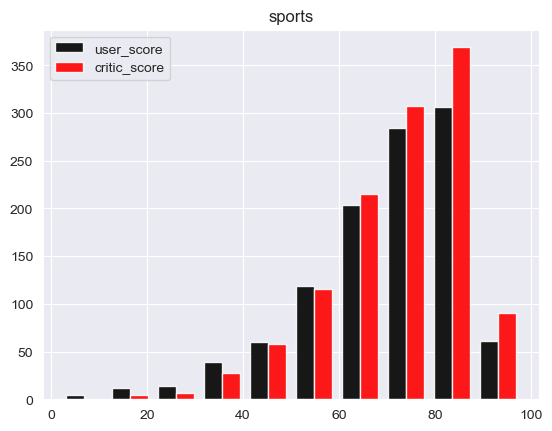

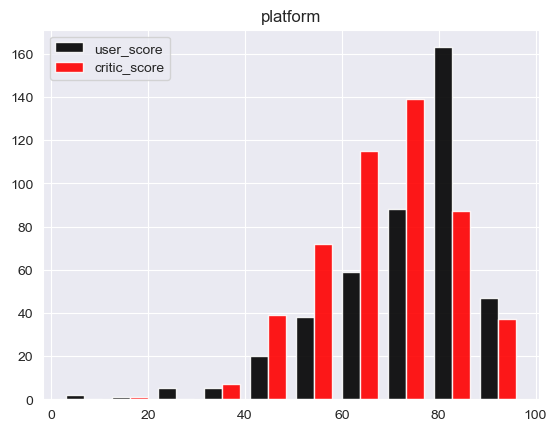

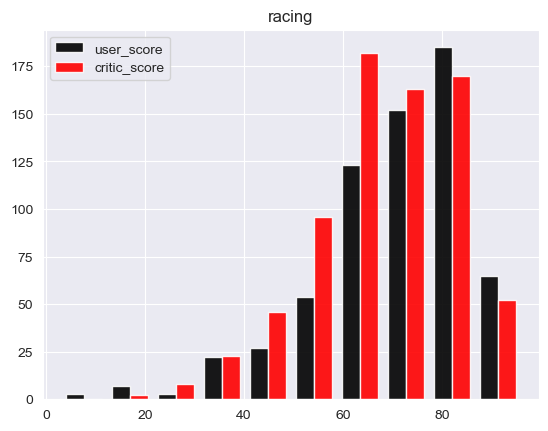

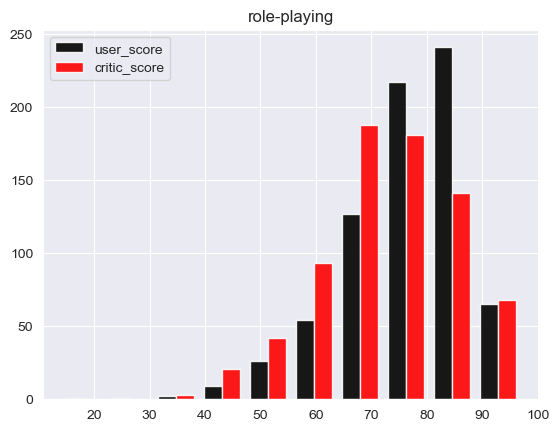

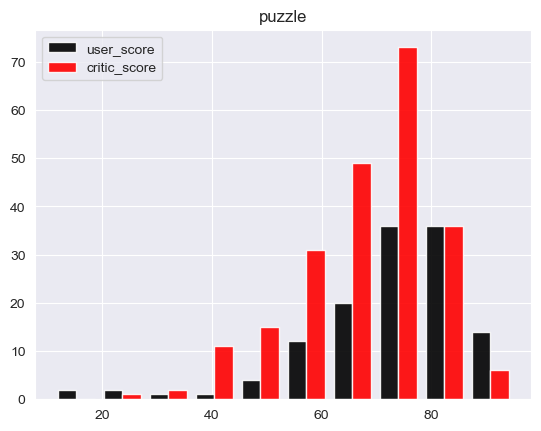

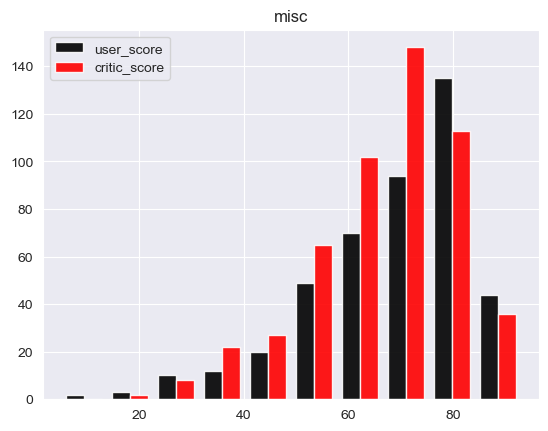

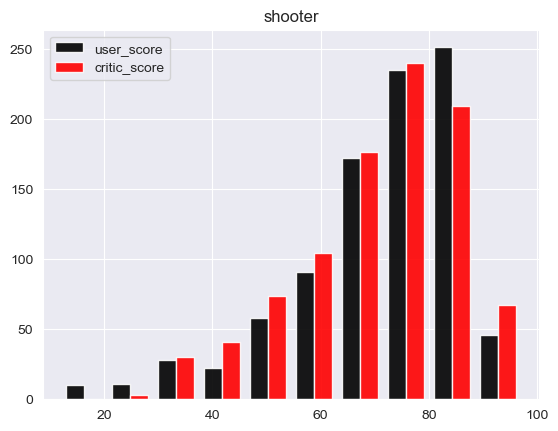

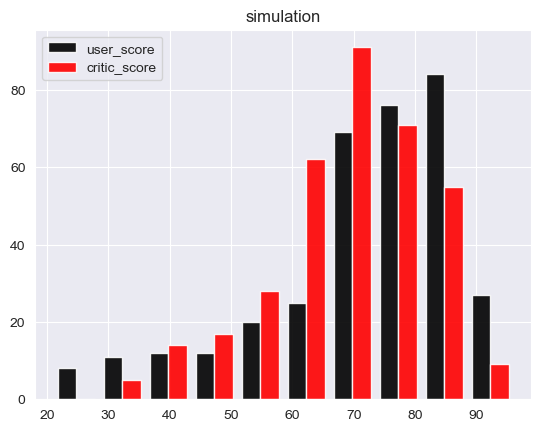

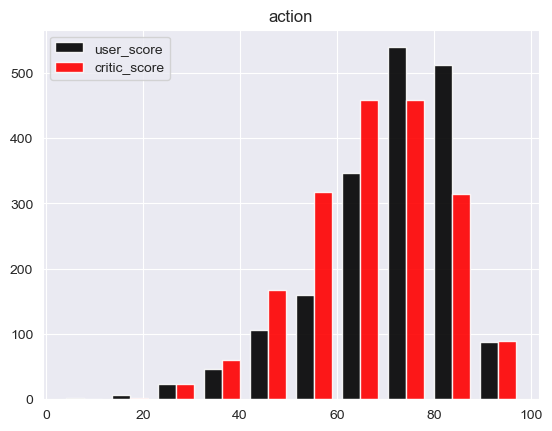

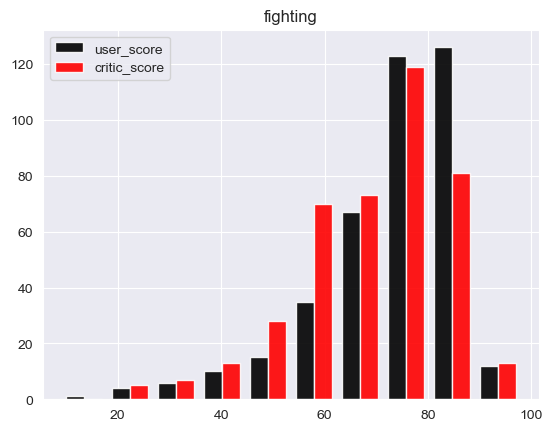

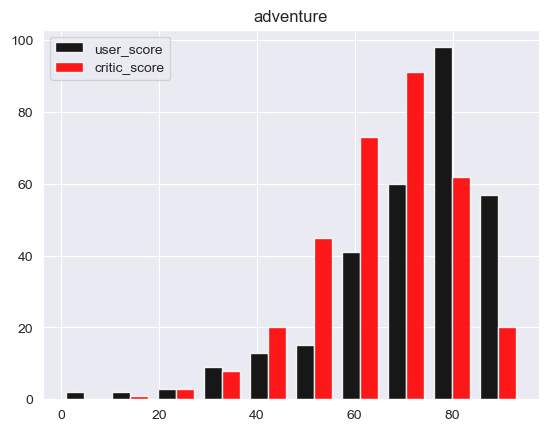

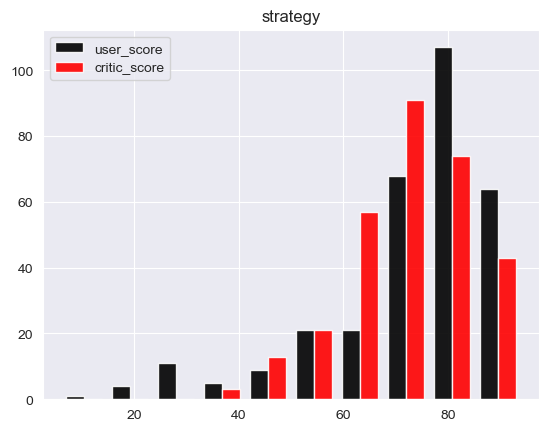

In [64]:
for genre in game_genres:
    genre_hist(genre)

Распределения оценок пользователей и критиков симметричны и оба смещены влево. Это означает, что в нашем датасете куда меньше игр с оценками критиков > 80 и оценками пользователей > 8.

# Проверим гипотезы.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные. Пороговое значение alpha зададим самостоятельно. Поясним:
Как мы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые¶
Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [65]:
# Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет)
xone_hyp = df[(df['platform']=='xone') & (df['year_of_release']>2006)]['user_score']
pc_hyp = df[(df['platform']=='pc') & (df['year_of_release']>2006)]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

6.521428571428572

In [66]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc_hyp.mean()


6.773024054982817

In [68]:
# Произведем проверку дисперсии выборок
np.var(df[df['platform']=='xone']['user_score'])

1.8965188383045533

In [69]:
np.var(df[df['platform']=='pc']['user_score'])

2.337747158036762

In [73]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.037253715630861925
Не получилось отвергнуть нулевую гипотезу


Вывод: Значение p-value равно чуть меньше 4%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, нам нужно раздвинуть доверительный интервал на 3.7%, чтобы можно было получить различность рейтингов двух платформ.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные¶
Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [74]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = df[(df['genre']=='action') & (df['year_of_release']>2006)]['user_score']
genre_sports_hyp = df[(df['genre']=='sports') & (df['year_of_release']>2006)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

6.839204545454545

In [75]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

6.3086294416243645

In [76]:
# Произведем проверку дисперсии выборок
np.var(df[df['genre']=='action']['user_score'])

2.030636653826616

In [77]:
np.var(df[df['genre']=='sports']['user_score'])

2.5941606711770206

In [78]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.064098789244688e-11
Отвергаем нулевую гипотезу


Вывод: Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

Вывод по проверке гипотез¶
Проверили гипотезы по функции ttest_ind, вычисляющей t-тест двух независимых выборок:

Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

# Общий вывод

Перед анализом данных мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок. Привели к правильным типам данных необходимые столбцы. Определили, что аббревиатура TBD значит to be determined, to be done. То есть, данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа. Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр. За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS. Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли. У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей. Самый популярный жанр за последние 10 лет: 'Action'. Якорем висит жанр 'Strategy'.

После мы составили портреты пользователей каждого региона за все года.

Самые популярные игровые платформы в Северной Америке это: XBOX, PS2, WII, PS3, DS. Топ 5 жанров в северной америке : action, sports, shooter, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS. Топ 5 жанров в Европе : action, sports, shooter, racing, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше".

Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS. Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Если брать данные за последний год (2016):\ То в Северной Америке:
Топ игровых платформ выглядит так: PS4, Xone, DS3;
Топ Жанров игр: Shooter, Action, Sports;
Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех".
В Европейском Союзе:

Топ игровых платформ : PS4, Xone, PC;
Топ жанров: Shooter, Sports, Action;
Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше".
В Японии:

Топ игровых платформ : 3DS, PS4, PSV;
Топ жанров: Action, Role-playing, Adventure;
Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех".
Для прогноза будущих продаж лучше брать данные за последний год, так как технологии стремительно развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше. На втором месте по продажам разместятся игры жанра Sports, для платформы PS4 и с рейтингом "для всех". И замкнут тройку лидеров тоже игры жанра Shooter с тем же рейтингом от 17 и выше, но уже для платформы XOne.